### Introduction

This notebook aims to perform a thorough exploratory data analysis (EDA) on the Automobile Dataset. After viewing and cleaning the data, visualisation and discussions are done, focussing on the price of cars and relating factors. First the average price of each make of car is evaluated. Following this a study is made on numerical features that are related to the price, such as the size and power of a car as well as the fuel usage. Lastly the relationship of the price with non-numeric values is explored including the fuel type, drive wheels, engine type and the number of cylinders.

In [ ]:
""" Program to perform exploratory data analysis (EDA) on Automobile Dataset.

Import the numpy, pandas, seaborn and matplotlib.pyplot libraries.
Load the data.
Examine the data by looking at the first few entries, the dtypes of each column,
and a description of the data.
Clean the data:
  Remove duplicate rows.
  Replace missing values with NA values for easier manipulation.
  Check the number of missing values.
  Fill in missing numeric values with clean_numeric_with_mean function.
  Remove records with missing string values.
Explore the data (with a focus on price):
  Visualise the average price by make
  Examine which numerical features influence the price.
  Visualise relationships between price and fuel type, drive wheels, engine type
  and number of cylinders as well as frequency of cars for fuel type, drive
  wheels, engine type and number of cylinders.

Functions:
-----
  clean_numeric_with_mean(df, column):
    Clean numeric data columns by replacing missing data with the mean value.
    Parameters:
    ---
      df : DataFrame
      column : str
    Returns:
    ---
      None
"""

' Program to perform exploratory data analysis (EDA) on Automobile Dataset.\n\nImport the numpy, pandas, seaborn and matplotlib.pyplot libraries.\nLoad the data.\nExamine the data by looking at the first few entries, the dtypes of each column,\nand a description of the data.\nClean the data:\n  Remove duplicate rows.\n  Replace missing values with NA values for easier manipulation.\n  Check the number of missing values.\n  Fill in missing numeric values with clean_numeric_with_mean function.\n  Remove records with missing string values.\nExplore the data (with a focus on price):\n  Visualise the average price by make\n  Examine which numerical features influence the price.\n  Visualise relationships between price and fuel type, drive wheels, engine type\n  and number of cylinders as well as frequency of cars for fuel type, drive\n  wheels, engine type and number of cylinders.\n\nFunctions:\n-----\n  clean_numeric_with_mean(df, column):\n    Clean numeric data columns by replacing missi

### Load Data:

In [ ]:
# Import libraries
import numpy as np
import pandas as pd
# Plotting libraries
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Load the data
automobile_df = pd.read_csv('automobile.txt')

### View Data:

In [ ]:
# Look at first 10 entries
automobile_df.head(10)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450
5,2,?,audi,gas,std,two,sedan,fwd,front,99.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,15250
6,1,158,audi,gas,std,four,sedan,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,17710
7,1,?,audi,gas,std,four,wagon,fwd,front,105.8,...,136,mpfi,3.19,3.40,8.5,110,5500,19,25,18920
8,1,158,audi,gas,turbo,four,sedan,fwd,front,105.8,...,131,mpfi,3.13,3.40,8.3,140,5500,17,20,23875
9,0,?,audi,gas,turbo,two,hatchback,4wd,front,99.5,...,131,mpfi,3.13,3.40,7.0,160,5500,16,22,?


#### Data Types:

In [ ]:
# Get data types
automobile_df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

#### Statistics of the data set

In [ ]:
# Get a description of the data
automobile_df.describe()

,symboling,wheel-base,length,width,height,curb-weight,engine-size,compression-ratio,city-mpg,highway-mpg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,10.142537,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,3.972040,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,7.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,8.600000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,9.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,9.400000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,23.000000,49.000000,54.000000


### Data Cleansing


#### Remove any duplicate rows

In [ ]:
# Remove duplicate rows
automobile_df.drop_duplicates(inplace=True)

#### Replace '?' values with NaN

In [ ]:
# Replace '?' with NA values
automobile_df.replace('?', pd.NA, inplace=True)

#### Check number of missing values

In [ ]:
# Count the number of missing values for each column
nan_counts = automobile_df.isna().sum()

# Print the counts
print("Number of missing values in each column:")
print(nan_counts)

Number of missing values in each column:
symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64


#### Function for numeric cleaning:

Create function to clean numeric columns by replacing missing with mean value

In [ ]:
def clean_numeric_with_mean(df, column):
  """Clean numeric data columns by replacing missing data with the mean value.

  Parameters:
  -----
      df : DataFrame
      column : str

    Returns:
    -----
      None
      """

  # Convert the column to numeric
  df[column] = pd.to_numeric(df[column], errors='coerce')

  # Calculate the mean excluding NaN values
  mean_column = df[column].mean()

  # Replace NaN values with the mean
  df[column].fillna(mean_column, inplace=True)

  # Convert the column to integer type
  df[column] = df[column].astype(int)

  # Print when completed
  print(f"\n{column} column succesfully cleaned.\n")

#### Cleaning the numeric fields

In [ ]:
# Clean 'normalized-losses' column
clean_numeric_with_mean(automobile_df, 'normalized-losses')

# Clean 'price' column
clean_numeric_with_mean(automobile_df, 'price')

# Clean 'horsepower' column
clean_numeric_with_mean(automobile_df, 'horsepower')

# Clean 'bore' column
clean_numeric_with_mean(automobile_df, 'bore')

# Clean 'stroke' column
clean_numeric_with_mean(automobile_df, 'stroke')

# Clean 'peak-rpm' column
clean_numeric_with_mean(automobile_df, 'peak-rpm')


normalized-losses column succesfully cleaned.


price column succesfully cleaned.


horsepower column succesfully cleaned.


bore column succesfully cleaned.


stroke column succesfully cleaned.


peak-rpm column succesfully cleaned.



#### Cleaning string field (number of doors)

In [ ]:
# Remove records where num-of-doors is missing
automobile_df = automobile_df[automobile_df['num-of-doors'].notna()]

### Data Exploration

Identify and create relationships that can help formulate ideas.

There are numerous relationships one can study from this dataset, which can be idetified by the specific needs of a company or consumer. To focus this study, however, we shall examine the factors that impact car prices.

#### Car Prices and relating factors

To start, let us look at the average price of each make of car.

##### Average Price by Make

<ipython-input-33-b681b1296d37>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='make', y='price', data=average_price_by_make, palette='viridis')


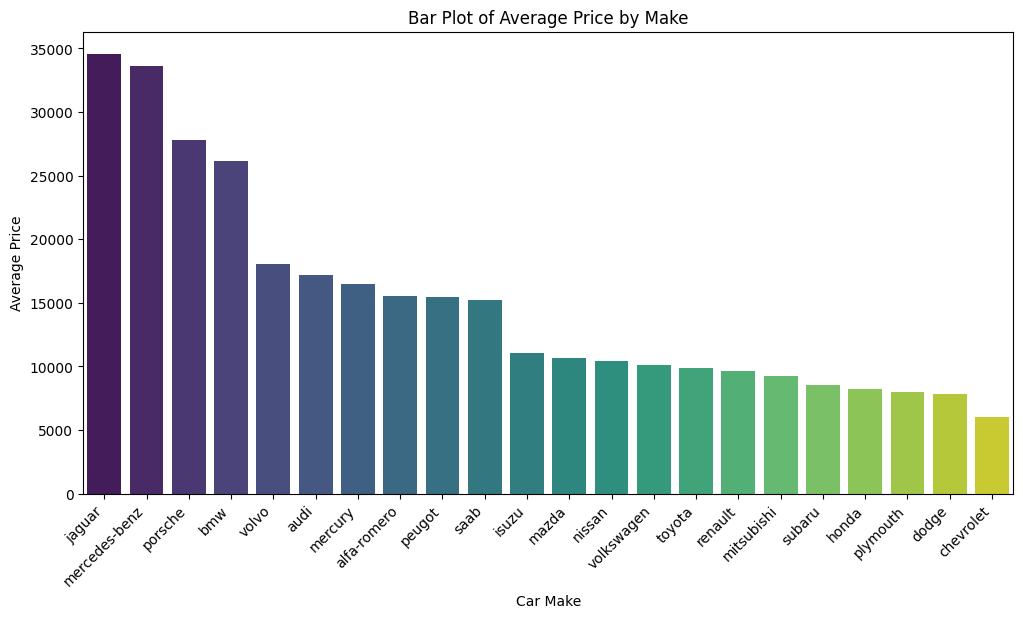

In [ ]:
# Calculate the average price by make
average_price_by_make = automobile_df.groupby('make')['price'].mean().sort_values(ascending=False).reset_index()

# Create bar plot of average price by make
plt.figure(figsize=(12, 6))
sns.barplot(x='make', y='price', data=average_price_by_make, palette='viridis')
plt.title('Bar Plot of Average Price by Make')
plt.xlabel('Car Make')
plt.ylabel('Average Price')
plt.xticks(rotation=45, ha='right')
plt.show()


From this we can identify three price groups of high, middle and low average prices as follows:

**High average price:** Jaguar, Mercedes-Benz, Porsche and BMW.

**Middle average price:** Volvo, Audi, Mercury, Alfa-Romero, Peugot and Saab.

**Low average price:** Isuzu, Mazda, Nissan, Volkswagen, Toyota, Renault, Mitsubishi, Subaru, Honda, Plymouth, Dodge and Chevrolet.

From these three groups we see that the high price group contains 4 makes, the middle group has 6 makes and the low price group has 12 makes. This identifies the demand for more affordable cars since there is a wider variety of makes of cars in the lower price range.

##### Numerical Features

Let us now study which numerical features influence the price.

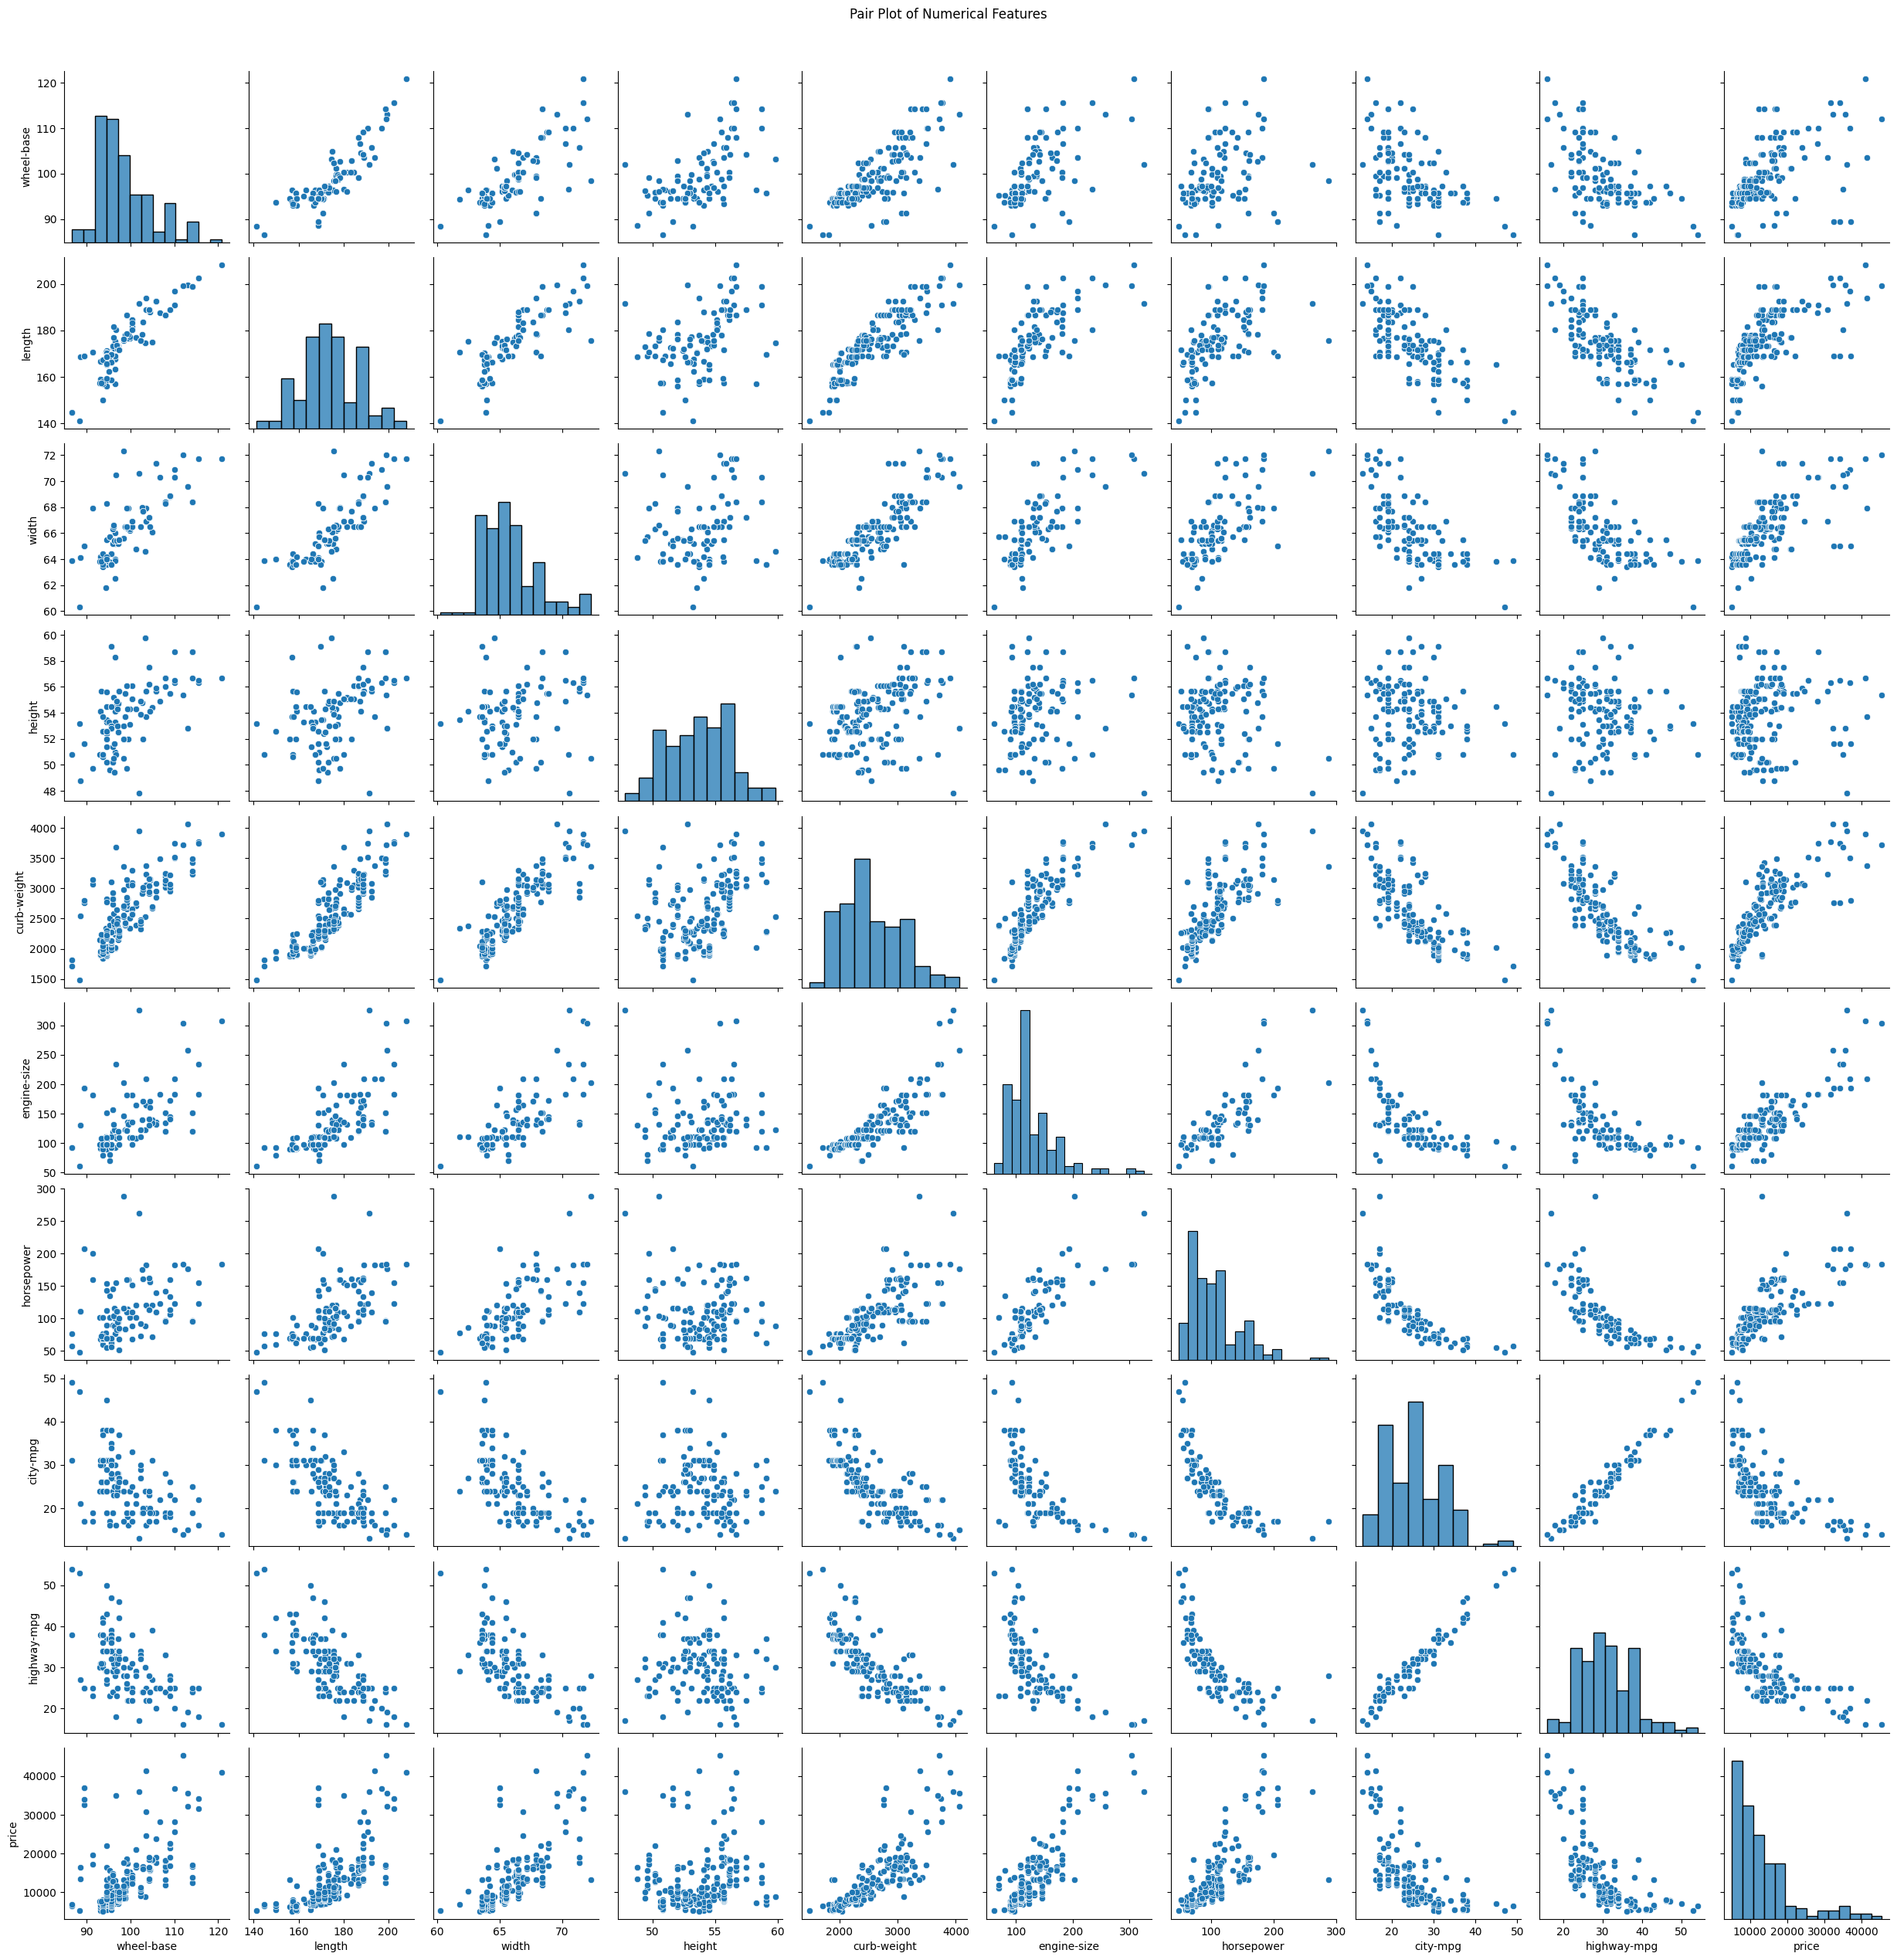

In [ ]:
# Select numerical features for the matrix scatter plot (pair plot)
numerical_features = ['wheel-base', 'length', 'width', 'height', 'curb-weight', 'engine-size', 'horsepower', 'city-mpg', 'highway-mpg', 'price']

# Create a pair plot of the numerical features
sns.pairplot(automobile_df[numerical_features])
plt.suptitle('Pair Plot of Numerical Features', y=1.02)
plt.show()

There is a lot to be seen here. However, focussing solely on the price graphs, we see that curb-weight, engine-size and horsepower all have fairly strong positive correlations with price. Hence, more powerful cars are more expensive. The wheel-base, length and width have a much weaker positive correlation with the price, indicating that larger cars tend to be more expensive, although the correlation gets weaker as the price increases. This may imply that the price of larger cars is impacted more so by other features than size alone. Larger cars may have a greater variation in features such as fuel type, drive wheels, engine type, number of cylinders and more. Whereas smaller cars may have less variation in these features. Interestingly, there appears to be no correlation between height and price.

For the city and highway mpg, we see a strong negative correlation with the price, indicating that more expensive cars get less miles per gallon than cheaper ones. This is likely due to more expensive cars having more power. We can verify this from the strong negative relationship between city and highway mpg and the curb-weight, engine-size and horsepower. From the price histogram, we can also see how there are far more cars in the lower price range, again indicating the higher demand for more affordable cars.

##### Non-numerical Relationships:

Let us look at the relationships between price and fuel type, drive wheels, engine type and the number of cylinders.

<ipython-input-35-a3988e5790e3>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='fuel-type', y='price', data=automobile_df, ax=axes[0, 0], palette='pastel')
<ipython-input-35-a3988e5790e3>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='fuel-type', data=automobile_df, ax=axes[0, 0].twinx(), palette='pastel', alpha=0.5)
<ipython-input-35-a3988e5790e3>:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='drive-wheels', y='price', data=automobile_df, ax=axes[0, 1], palette='pastel')
<ipython-input-35-a3988e5790e3>:16: FutureWarni

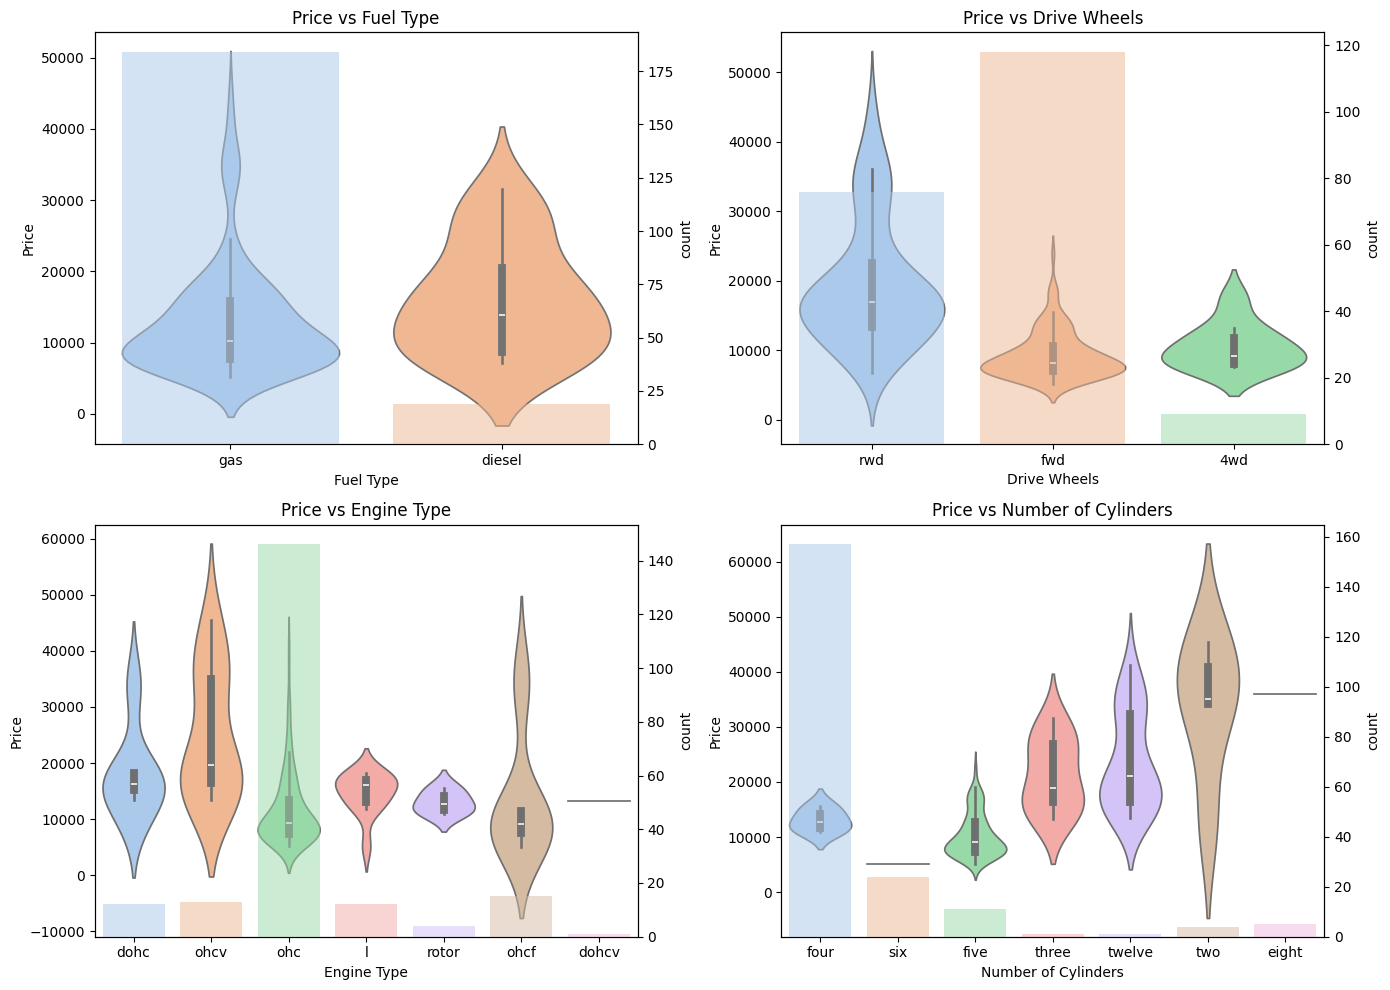

In [ ]:
# Set up the figure with a 2x2 grid
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(14, 10))

# First plot: Violin plot of price vs fuel type with count plot of fuel type
sns.violinplot(x='fuel-type', y='price', data=automobile_df, ax=axes[0, 0], palette='pastel')
axes[0, 0].set_title('Price vs Fuel Type')
axes[0, 0].set_xlabel('Fuel Type')
axes[0, 0].set_ylabel('Price')
sns.countplot(x='fuel-type', data=automobile_df, ax=axes[0, 0].twinx(), palette='pastel', alpha=0.5)

# Second plot: Violin plot of price vs drive wheels with count plot of drive wheels
sns.violinplot(x='drive-wheels', y='price', data=automobile_df, ax=axes[0, 1], palette='pastel')
axes[0, 1].set_title('Price vs Drive Wheels')
axes[0, 1].set_xlabel('Drive Wheels')
axes[0, 1].set_ylabel('Price')
sns.countplot(x='drive-wheels', data=automobile_df, ax=axes[0, 1].twinx(), palette='pastel', alpha=0.5)

# Third plot: Violin plot of price vs engine type with count plot of engine type
sns.violinplot(x='engine-type', y='price', data=automobile_df, ax=axes[1, 0], palette='pastel')
axes[1, 0].set_title('Price vs Engine Type')
axes[1, 0].set_xlabel('Engine Type')
axes[1, 0].set_ylabel('Price')
sns.countplot(x='engine-type', data=automobile_df, ax=axes[1, 0].twinx(), palette='pastel', alpha=0.5)

# Fourth plot: Scatter plot of price vs engine size with a regression line
sns.violinplot(x='num-of-cylinders', y='price', data=automobile_df, order=['two','three','four','five','six','eight','twelve'],ax=axes[1, 1], palette='pastel')
axes[1, 1].set_title('Price vs Number of Cylinders')
axes[1, 1].set_xlabel('Number of Cylinders')
axes[1, 1].set_ylabel('Price')
sns.countplot(x='num-of-cylinders', data=automobile_df, ax=axes[1, 1].twinx(), palette='pastel', alpha=0.5)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In the first plot we can see that cars with gas fuel type have a lower mean price than diesel cars, as well as a higher concentration of cars in the lower price range. There are, however, anomalies with high prices, likely due to more sporty cars. The diesel fuel type cars have a higher mean price and more spread in the price distribution.

From the price vs drive wheels plot we can see that rear wheel drive cars tend to be more expensive than front wheel and 4-wheel drive cars, with a much larger range in price too. The most common type of car is front wheel drive where the number of cars in this category are concentrated in the lower price range.

For the different engine types, it appears that ohc engine type has the lowest mean price as well as being the most common engine type by far. The ohcv engine type has the highest mean price as well as one of the largest ranges in price together with the ohcf engine type. The ohcf engine type, however, has a low mean price.

In the fourth plot we see that the cheapest and most common cars are those with four cylinders. Five, six, eight and even two cylinder cars have higher mean prices, with the mean price of eight cylinder cars being particulrly high. Three and twelve cylinder cars appear to only have one entry each thus having little information. However, the price of the twelve cylinder car is high, while the three cylinder price is low.

From all four count plots we can again see the demand for more affordable cars since the fuel types, drive wheels, engine types and number of cylinders with the lowest mean prices all have the highest car count.